In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
# %matplotlib inline
import tensorflow as tf


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import splitfolders



import keras
from tensorflow.keras import layers, Model

**SPLIT DATASET TO TEST,TRAIN,VAL**

In [2]:
path='D:\\TA\\Dataset'
oldPath='D:\\TA\\RAW'

splitfolders.ratio(oldPath, output=path,
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

**PATH FOR EACH DIRECTORY**

In [2]:
train_dir='D:\\TA\\Dataset\\train'
val_dir='D:\\TA\\Dataset\\val'
test_dir='D:\\TA\\Dataset\\test'

**AUGMENTATION DATA AND PREPROCESS**

In [3]:
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.5,
                                   rotation_range = 45,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 50,
                                
                                  )

# height_shift_range=  0.3,
#                                    width_shift_range=  0.3,
#                                    shear_range=50,
#                                    brightness_range=[1,2]
valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                  )

test_datagen  = ImageDataGenerator(rescale = 1.0 / 255.0)

In [4]:
train_dataset  = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 16, 
                                                   
                                                   )

validation_dataset = valid_datagen.flow_from_directory(directory = val_dir,
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 16, 
                                                  )



test_dataset = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 16)

Found 1072 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 137 images belonging to 3 classes.


Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


Text(0.5, 1.0, 'Shear 50')

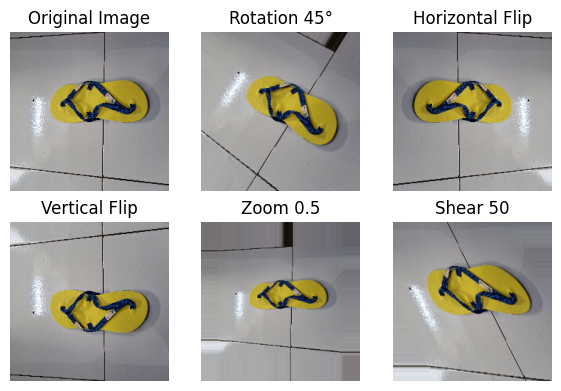

In [10]:
# import cv2
import matplotlib.pyplot as plt
img = "D:\\augmentasi\\"


zoom = ImageDataGenerator(zoom_range = 0.5)
flipHor = ImageDataGenerator(horizontal_flip = True)
flipVer = ImageDataGenerator(vertical_flip = True)
rotation = ImageDataGenerator(rotation_range = 45)
scale = ImageDataGenerator(rescale = 1.0 / 255.0)
# height = ImageDataGenerator(height_shift_range=  0.3)
# width = ImageDataGenerator(width_shift_range=  0.3)
shear = ImageDataGenerator(shear_range=50)
# bright = ImageDataGenerator(brightness_range=[1,2])
non=ImageDataGenerator()

zoom = zoom.flow_from_directory(target_size=(224, 224),directory=img)
# width = width.flow_from_directory(target_size=(224, 224),directory=img)
# height = height.flow_from_directory(target_size=(224, 224),directory=img)
shear = shear.flow_from_directory(target_size=(224, 224),directory=img)
flipHor = flipHor.flow_from_directory(target_size=(224, 224),directory=img)
flipVer = flipVer.flow_from_directory(target_size=(224, 224),directory=img)
rotation = rotation.flow_from_directory(target_size=(224, 224),directory=img)
# bright = bright.flow_from_directory(target_size=(224, 224),directory=img)
data_non=non.flow_from_directory(target_size=(224, 224),directory=img)
test=scale.flow_from_directory(target_size=(224, 224),directory=img)

fig = plt.figure(figsize=(7,7))


fig.add_subplot(3, 3, 5)
plt.imshow(zoom.next()[0][0].astype('int'))
plt.axis('off')
plt.title("Zoom 0.5")

fig.add_subplot(3, 3, 2)
plt.imshow(rotation.next()[0][0].astype('int'))
plt.axis('off')
plt.title("Rotation 45°")

fig.add_subplot(3,3, 3)
plt.imshow(flipHor.next()[0][0].astype('int'))
plt.axis('off')
plt.title("Horizontal Flip")

fig.add_subplot(3, 3, 4)
plt.imshow(flipVer.next()[0][0].astype('int'))
plt.axis('off')
plt.title("Vertical Flip")

# fig.add_subplot(3, 3, 6)
# plt.imshow((test.next()[0][0]*255).astype('int'))
# plt.axis('off')
# plt.title("rescale")

fig.add_subplot(3, 3, 1)
plt.imshow(data_non.next()[0][0].astype('int'))
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(3, 3, 6)
plt.imshow(shear.next()[0][0].astype('int'))
plt.axis('off')
plt.title("Shear 50")

# fig.add_subplot(3, 3, 7)
# plt.imshow(bright.next()[0][0].astype('int'))
# plt.axis('off')
# plt.title("Brightness Range 1-2")

# fig.add_subplot(3, 3, 8)
# plt.imshow(height.next()[0][0].astype('int'))
# plt.axis('off')
# plt.title("Height Shift 0.3")

# fig.add_subplot(3, 3, 9)
# plt.imshow(width.next()[0][0].astype('int'))
# plt.axis('off')
# plt.title("Width Shift 0.3")



In [5]:
base_model = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in base_model.layers:
  layer.trainable = False

In [6]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
# x = layers.BatchNormalization()(x)

x = layers.Dense(4096, activation='relu')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.5)(x)
predictions = layers.Dense(3, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
# monitor = EarlyStopping(monitor='val_loss', patience=10, 
#                         verbose=1, mode='min',restore_best_weights=True)
# Defining Callbacks

filepath = 'D:\TA\Code\model.hdf5'
checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_loss', 
                                mode='min', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [checkpoint]

model.compile(loss='sparse_categorical_crossentropy'
    , optimizer=keras.optimizers.Adam(1e-5)
    , metrics=['accuracy']
)

In [10]:
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    for device in physical_devices:
        device_name = device.name
        gpu_name = device_name.split(':')[1]
        
        print("GPU name:", gpu_name)
else:
    print("No GPU devices found.")   

GPU name: GPU


In [8]:
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=150,
                              verbose=1, callbacks=callback_list)

Epoch 1/150
67/67 [==============================] - ETA: 0s - loss: 0.8547 - accuracy: 0.5644
Epoch 1: val_loss improved from inf to 0.60962, saving model to D:\TA\Code\model.hdf5
67/67 [==============================] - 82s 1s/step - loss: 0.8547 - accuracy: 0.5644 - val_loss: 0.6096 - val_accuracy: 0.7444
Epoch 2/150
67/67 [==============================] - ETA: 0s - loss: 0.6125 - accuracy: 0.7323
Epoch 2: val_loss improved from 0.60962 to 0.53986, saving model to D:\TA\Code\model.hdf5
67/67 [==============================] - 63s 940ms/step - loss: 0.6125 - accuracy: 0.7323 - val_loss: 0.5399 - val_accuracy: 0.7368
Epoch 3/150
67/67 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.7528
Epoch 3: val_loss improved from 0.53986 to 0.49656, saving model to D:\TA\Code\model.hdf5
67/67 [==============================] - 64s 944ms/step - loss: 0.5680 - accuracy: 0.7528 - val_loss: 0.4966 - val_accuracy: 0.8271
Epoch 4/150
67/67 [==============================] - ETA

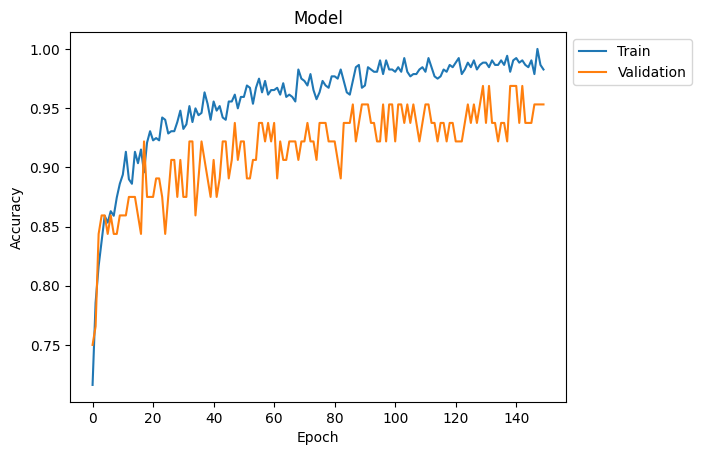

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

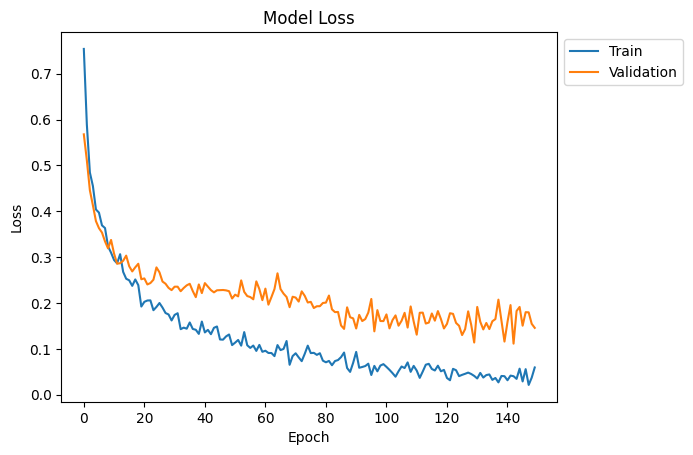

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()